# MS960 - Aprendizado de Máquinas: Aspectos Teóricos e Práticos

## 2S2021 - Projeto III - Relatório Simplificado

### Grupo:

- **RA 155743 - Hugo Ricardo Ribeiro Matarozzi;**
- **RA 170093 - Isabella Mi Hyun Kim;**
- **RA 195171 - Bryan Alves do Prado.**

---

# Inicialização

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy as cp

from matplotlib.animation import FuncAnimation
from pathlib import Path
from collections import defaultdict
from scipy.io import loadmat
from scipy.optimize import minimize
from random import randint
from numpy.linalg import svd

%matplotlib inline

In [2]:
filepath_dado1 = './dado1.mat'
filepath_dado2 = './dado2.mat'
filepath_dado3 = './dado3.txt'

---
# Parte I - Análise de Componentes Principais

> Uma das aplicações mais interessantes e surpreendentes de análise de componentes principais é no reconhecimento facial (_eigenfaces_). Nesta parte, você implementará este algoritmo para um pequeno conjunto de imagens de rostos.


## Questão 1

> Carregue os dados do arquivo _dado1.mat_. A variável $X$ contém uma matriz em que cada linha corresponde a imagens de faces em tons de cinza, com tamanho original $32\times 32$, mas convertidas para um vetor de 1024 componentes. Mostre $100$ imagens quaisquer desta base (lembre-se de reconverter o vetor linha para uma imagem). Implemente o algoritmo de PCA como visto em aula e rode sobre esta base de faces.

Etapas:

1. Carregar dados;
2. Exibir imagens;
3. Implementação do algoritmo PCA;
4. Execução do algoritmo sobre a base de faces.

### 1.1 Carregar dados

Carregamos os dados do arquivo e os armazenamos em forma de _array_ em _X1_.

In [3]:
dado1 = loadmat(filepath_dado1)
X = dado1.get('X')

### 1.2 Exibir imagens

Primeiramente criamos função que, dado vetor de 1024 componentes, constrói e exibe a imagem de tamanho $32\times 32$:

In [4]:
def show_img(img_arr):
    pixels = img_arr.reshape((32, 32))  # Reconverter vetor linha para imagem
    plt.imshow(pixels.T, cmap='gray')  # Exibir imagem (transposta, pois imagem está de lado após reconversão)
    plt.xticks([])
    plt.yticks([])

A partir desta função, podemos exibir uma amostra de 100 imagens:

In [5]:
def show_img_grid(data, n_imgs=100, grid_v=10, grid_h=10, img_size=15, randomic=True, inverse_order=False):
    fig = plt.figure(figsize=(img_size,img_size))  # Configurar tamanho do grid
    fig.subplots_adjust(hspace=0, wspace=0)  # Configurar espaçamento do grid

    for i in range(n_imgs):
        ax = fig.add_subplot(grid_v, grid_h, i+1)
        num = i
        if inverse_order:
            num = data.shape[1] - i - 1  # Inversão de ordem: pegar as últimas n_imgs imagens
        if randomic:
            num = randint(0, len(data) - 1)  # Tomando imagem aleatória
        show_img(data[num])

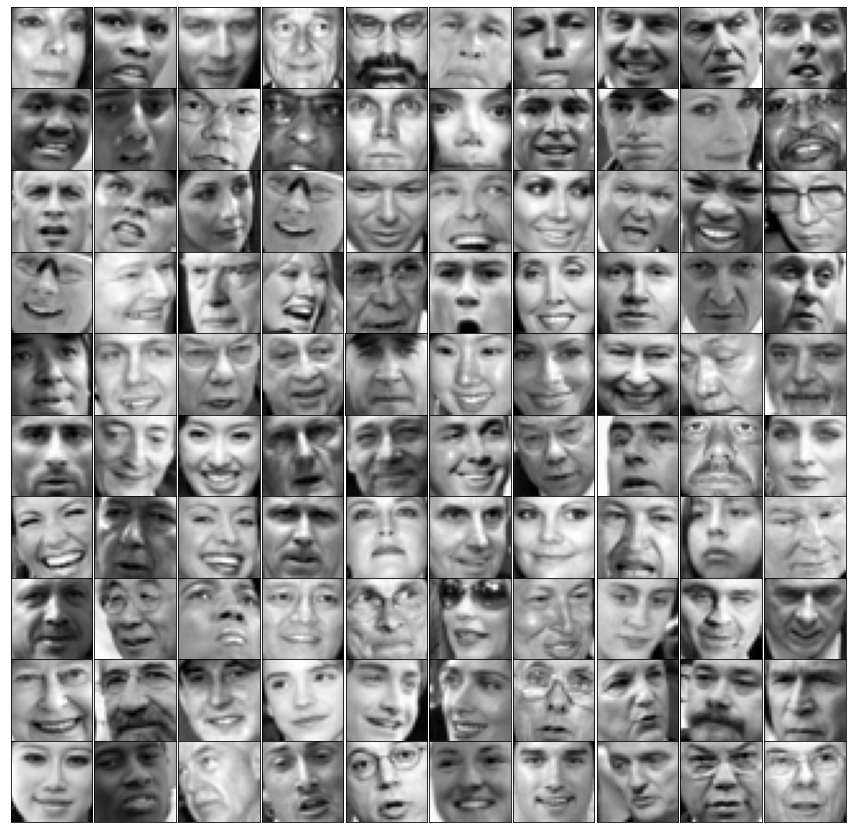

In [6]:
show_img_grid(X, 100, 10, 10, 15)

### 1.3 Implementação do algoritmo PCA

Agora implementamos o algoritmo PCA. Primeiramente, criamos função para normalizar as colunas de $X$.


In [7]:
def feature_normalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    
    X_norm = (X-mu)/sigma
    
    return X_norm, mu, sigma

E após isso, criamos a função que realiza a decomposição _SVD_ da matriz de covariância $X^TX$. 

In [8]:
def pca(X):
    m, n = X.shape
    Sigma = (1/m)*(X.T @ X)
    U, S, V = svd(Sigma)
    
    return U, S, V

### 1.4 Execução do algoritmo sobre a base de faces

Por fim, aplicamos a normalização e, em seguida, a função _pca_ sobre os dados normalizados:

In [9]:
X_norm, mu, std = feature_normalize(X)
U, S, V = pca(X_norm)

## Questão 2

> Os componentes PCA (autovetores) principais neste tipo de aplicação são o que se chama de _eigenfaces_ e eles podem ser visualizados se forem reformatados para uma imagem $32 \times 32$. Mostre em seu código as _eigenfaces_ correspondentes aos 36 primeiros componentes principais. Comente no relatório sobre o que observa nestas imagens.

Etapas:

1. Mostrar 36 componentes principais separadas
2. Mostrar 36 componentes principais juntas

### 2.1 Mostrar 36 componentes principais separadas

Primeiramente mostramos as componentes separadas, em uma grade semelhante à grade da exibição anterior.

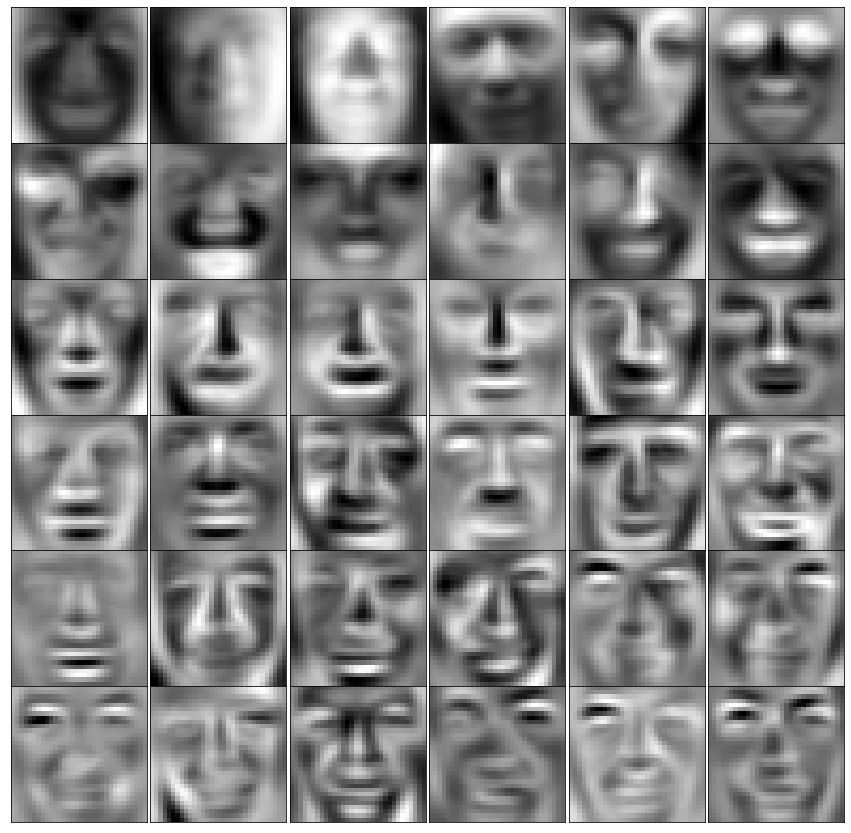

In [10]:
show_img_grid(V, 36, 6, 6, 15, randomic=False)

As 36 _eigenfaces_ representam os 36 autovetores de $X^{T}X$ com os maiores autovalores. Elas representam as características que dão maior variância entre os dados em $X$, de forma a exibirem diferentes características relevantes na formação das imagens dos rostos, como formato da face, dos olhos, da boca, entre outros. E contraste, temos as _eigenfaces_ referentes aos últimos 36 componentes principais:

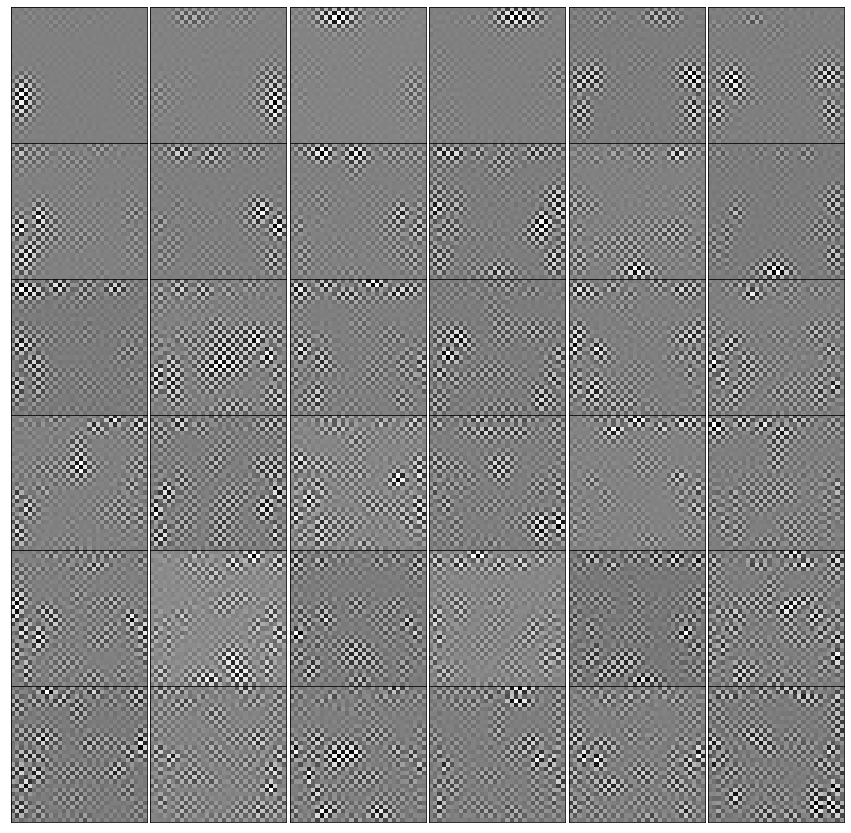

In [11]:
show_img_grid(V, 36, 6, 6, 15, randomic=False, inverse_order=True)

Neste caso, não identificamos nenhuma relação com os rostos da base de dados. São componentes que de fato não parecem representar características importantes de nossas imagens.

### 2.2 Mostrar 36 componentes principais juntas

Podemos pensar se uma mera combinação linear trivial (soma simples) das 36 componentes principais nos trazem informações novas ou uma boa representação de nossos dados. Podemos visualizar a variação na soma de componentes por vídeo, criado a partir do código:

In [12]:
def eigenfaces_video(V, lim):
    
    # Configurando eixos
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_ylim(0, 30)
    line, = ax.plot(0, 0)

    # Função para criar frame
    def animation_frame(i):
        img_arr = np.zeros(1024)
        for j in range(i):
            img_arr = img_arr + V[j, :]
        pixels = img_arr.reshape((32, 32))  # Reconverter vetor linha para imagem
        plt.imshow(pixels.T, cmap='gray')  # Exibir imagem (transposta, pois imagem está de lado após reconversão)
        plt.xticks([])
        plt.yticks([])
        plt.title(f'Eigenface 1 - {i+1}')
        
    ax.invert_yaxis()  # Inversão do eixo, pois frame é realizado de ponta-cabeça

    # Criando animação
    animation = FuncAnimation(fig, func=animation_frame, frames=np.arange(0, lim, 1), interval=10)

    # Criando pasta e salvando animação
    Path("images").mkdir(parents=True, exist_ok=True)
    animation.save(f'images/36eigen.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.


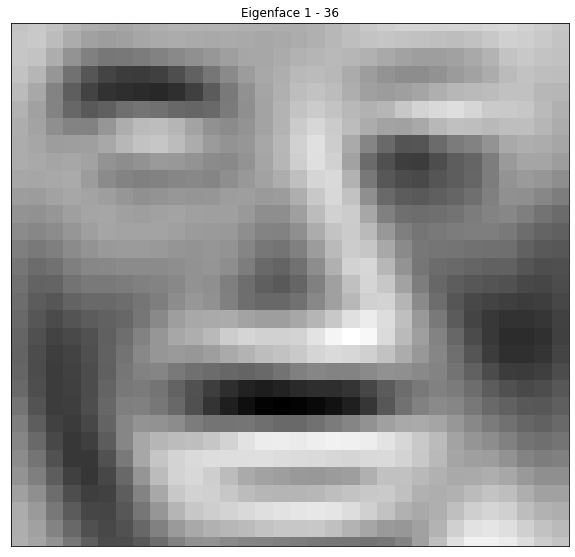

In [13]:
eigenfaces_video(V, 36)

<img src="images/36eigen.gif" width="500" align="center">

É possíve notar que o acúmulo de características, pela soma das 36 eigenfaces, permite a identificação do tipo de imagem - rostos - de nosso banco de dados. Ainda sim, é um rosto genérico devido ao simples acúmulo de características sem pesos distintos.

## Questão 3

> Projete a matriz _X_ sobre os 100 componentes principais e reconstrua o dado original sobre esta projeção. Mostre as imagens originais de 100 faces ao lado das imagens reconstruídas. Comente no relatório sobre o que achou da reconstrução e implicações práticas deste processo.

Etapas:

1. Função para projeção sobre $n$ componentes principais;
2. Função para exibição de imagens originais e reconstruídas, lado a lado;
3. Visualização da evolução da reconstrução.

### 3.1 Função para projeção sobre $n$ componentes principais;

Primeiramente construímos uma função que realiza a projeção da imagem sobre as $n$ primeiras componentes principais:

In [13]:
def project_pca(U, img_array, n, show=False):
    img_alt = U[:, :n] @ U[:, :n].T @ img_array.T  # Criação da imagem projetada
    if show:
        show_img(img_alt)  # Exibir imagem
    
    return img_alt

array([ 49.77078705,  48.63814578,  43.67551544, ...,  -5.00441832,
        -8.16057134, -10.28313591])

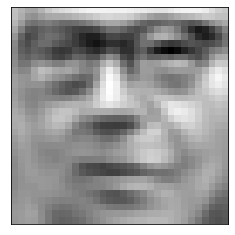

In [15]:
project_pca(U, X[489], 100, show=True)

### 3.2 Função para exibição de imagens originais e reconstruídas, lado a lado

Agora exibimos as imagens originais e reconstruídas, lado a lado para melhor comparação, tomadas aleatoriamente:

In [14]:
def sbs_img_plot(img_array_1, img_array_2):
    fig = plt.figure(figsize=(25,25))  # Configurar tamanho do grid
    fig.subplots_adjust(hspace=0, wspace=0)  # Configurar espaçamento do grid

    # Bloco referente à imagem reconstruída
    ax = fig.add_subplot(5, 5, 1)
    show_img(img_array_1)
    plt.title('Reconstruída')
    
    # Bloco referente à imagem original
    ax = fig.add_subplot(5, 5, 2)
    show_img(img_array_2)
    plt.title('Original')


<ipython-input-14-3f428373943a>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(25,25))  # Configurar tamanho do grid


KeyboardInterrupt: 

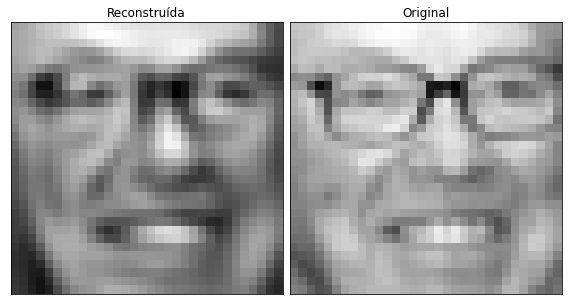

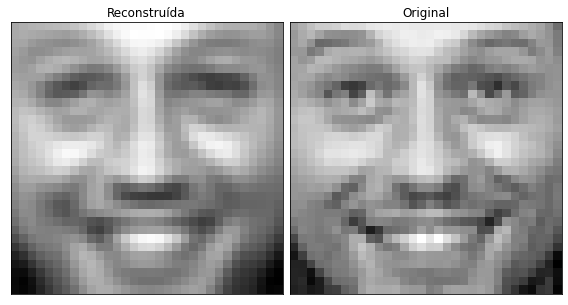

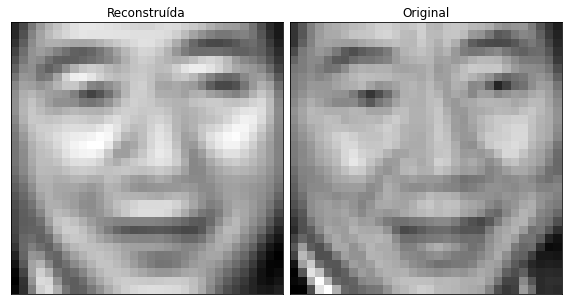

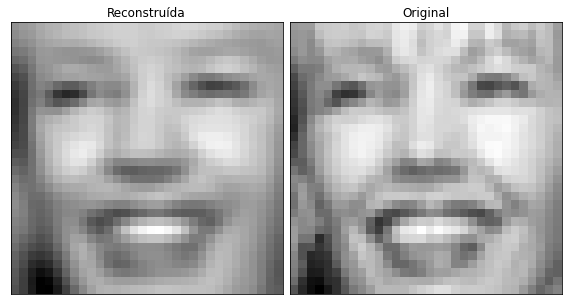

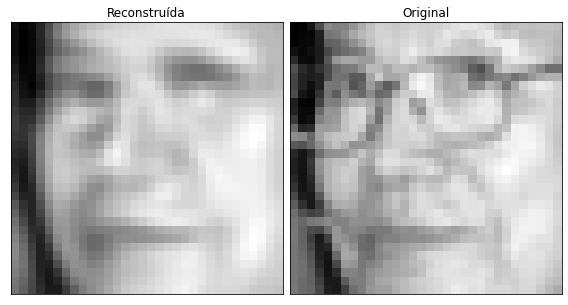

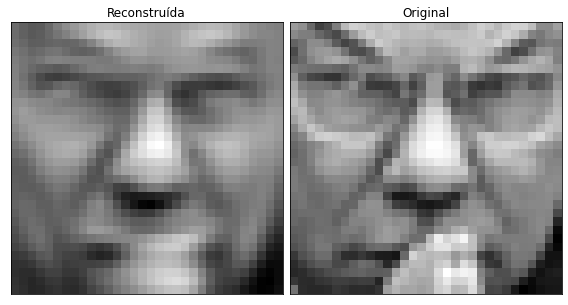

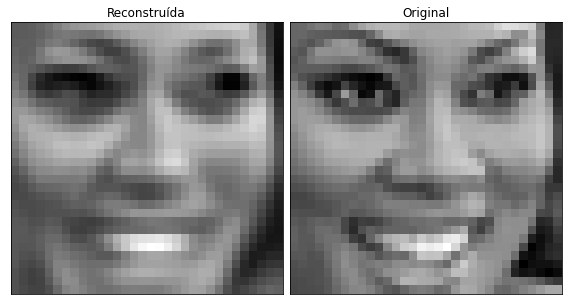

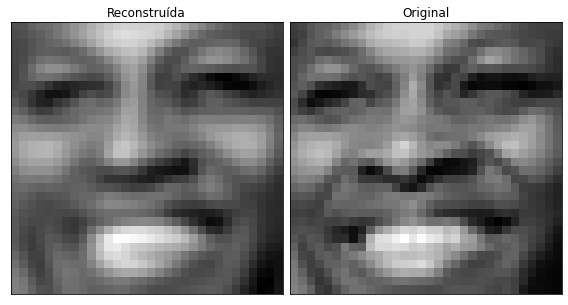

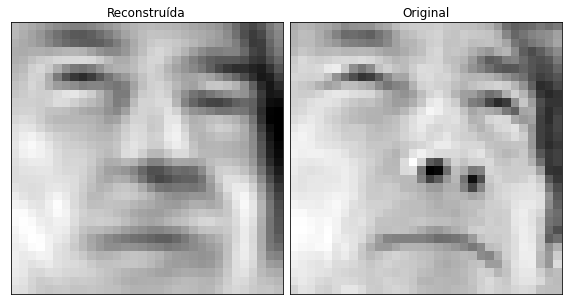

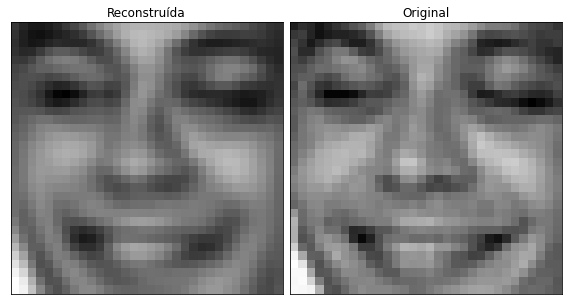

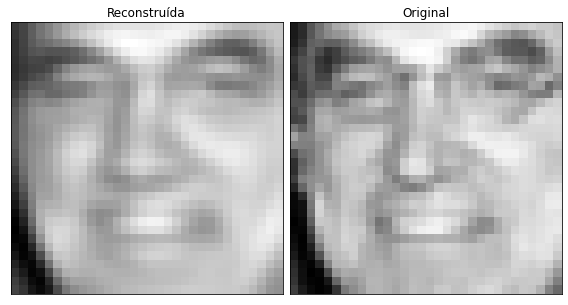

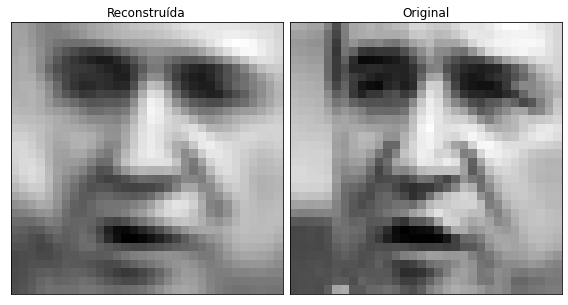

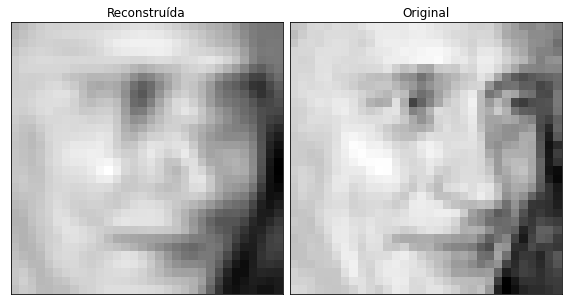

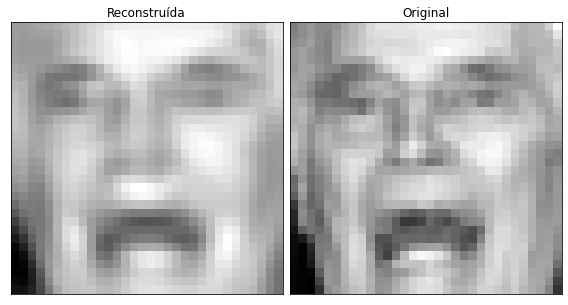

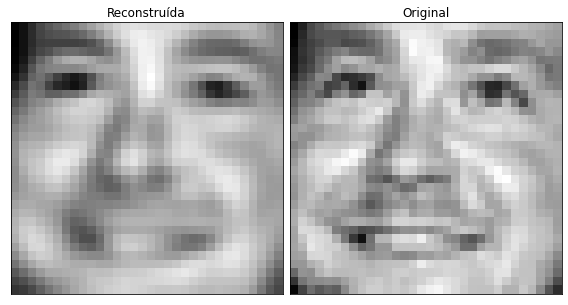

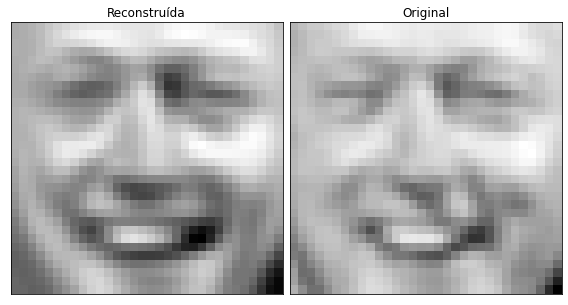

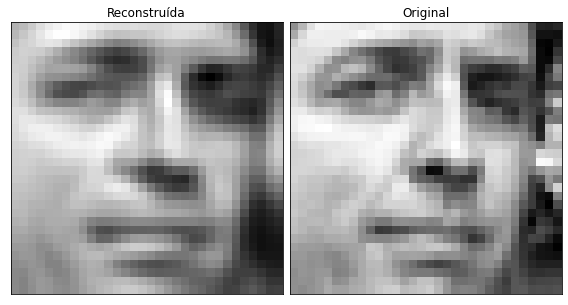

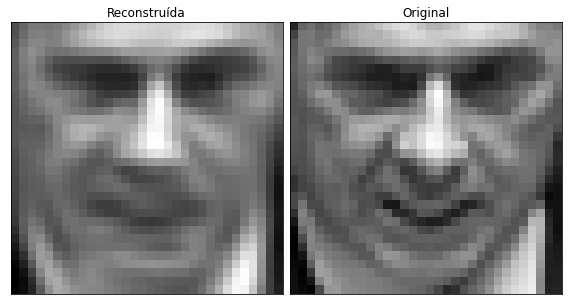

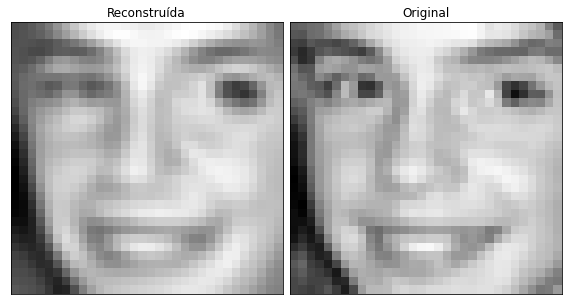

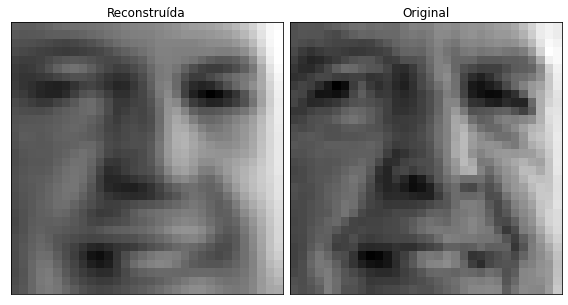

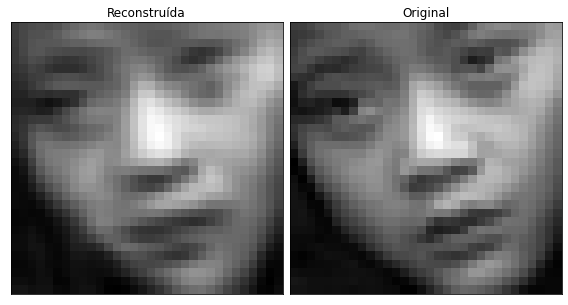

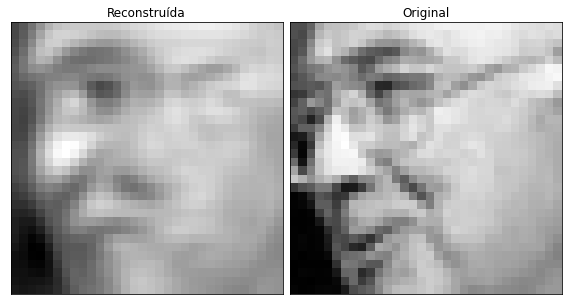

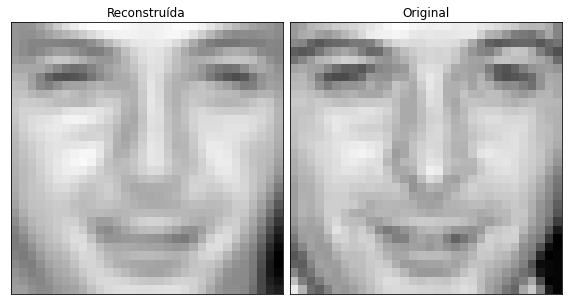

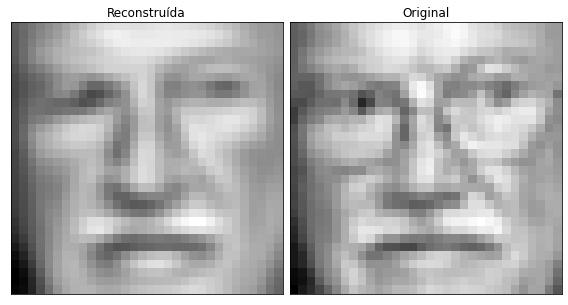

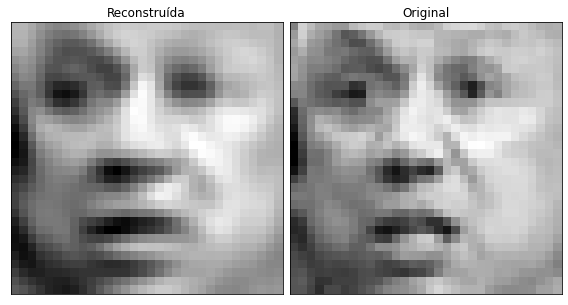

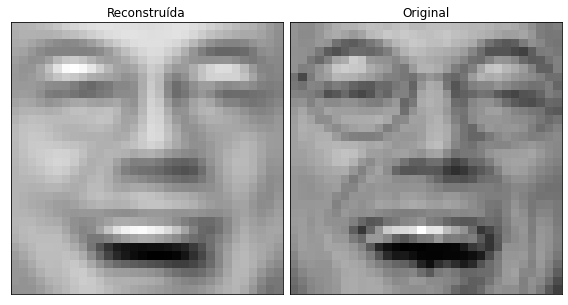

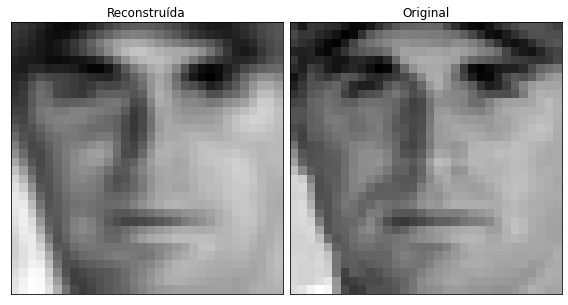

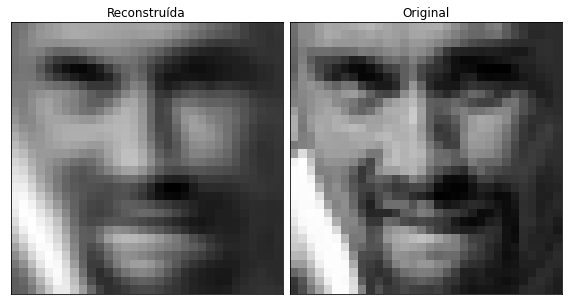

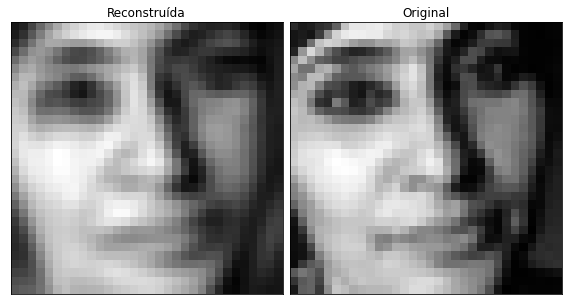

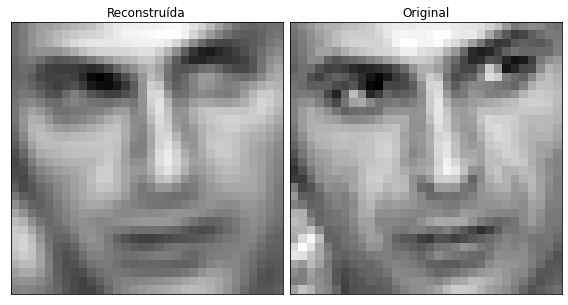

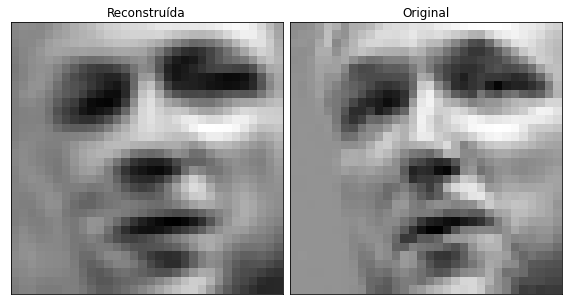

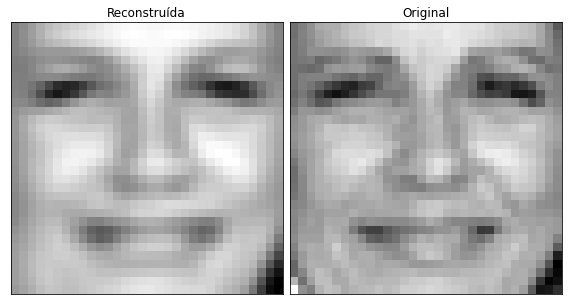

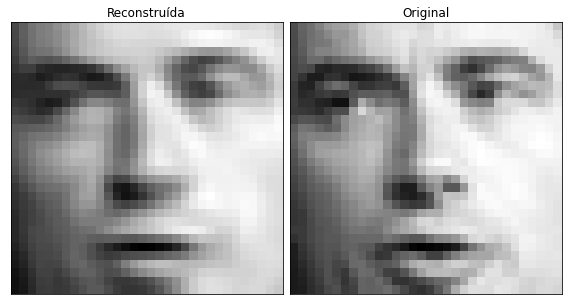

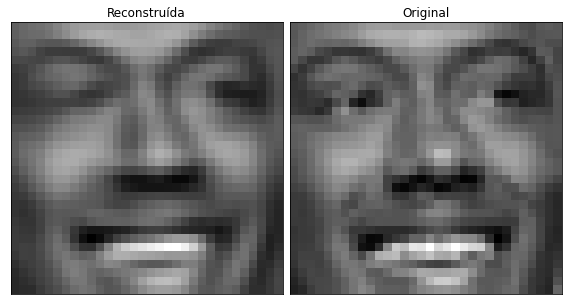

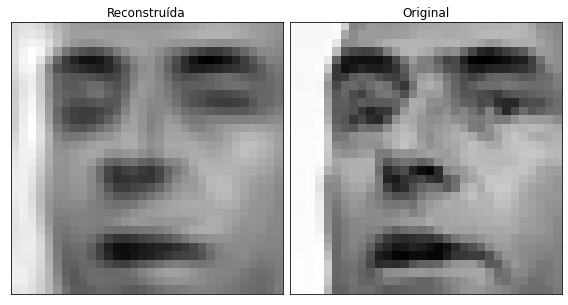

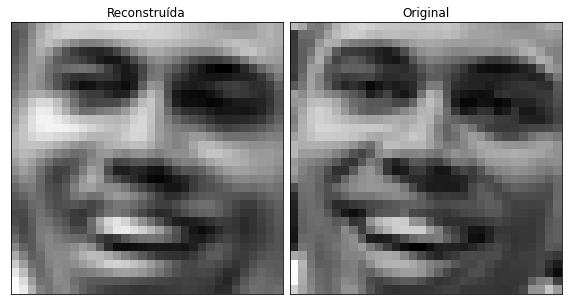

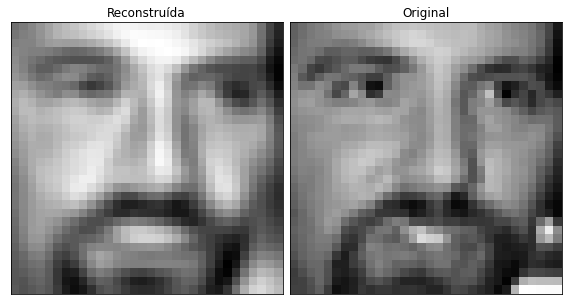

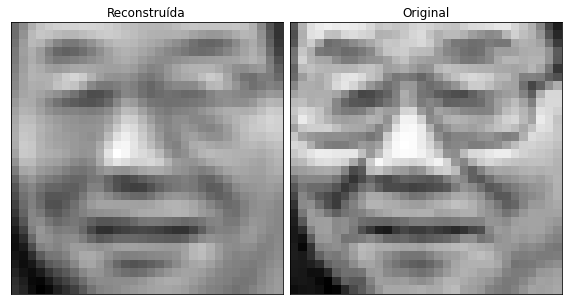

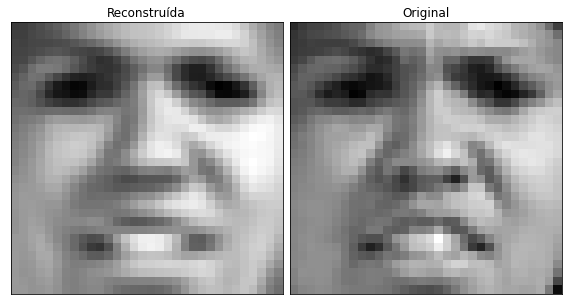

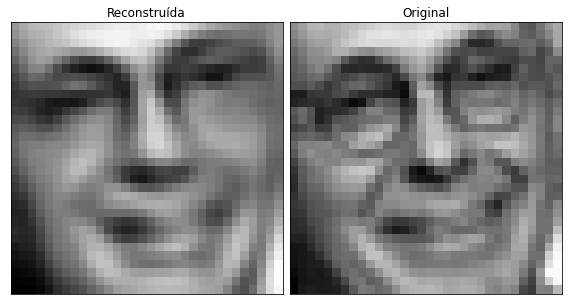

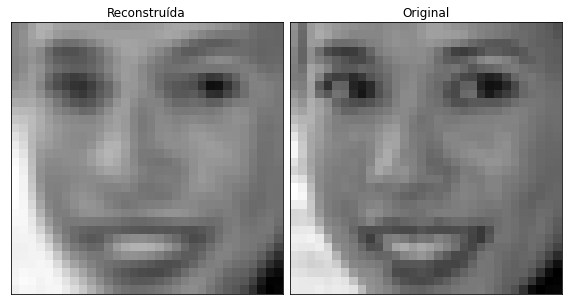

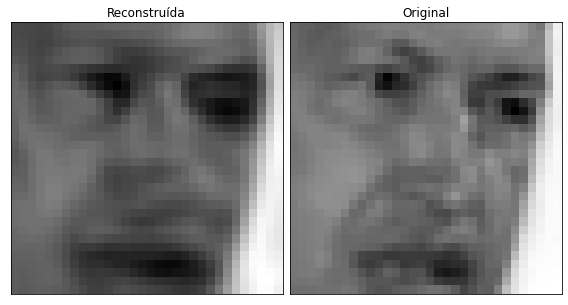

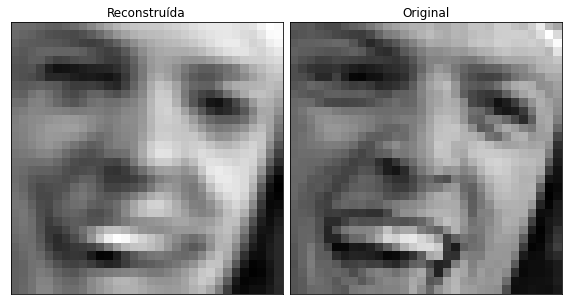

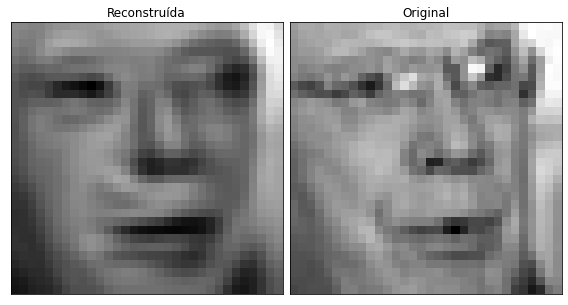

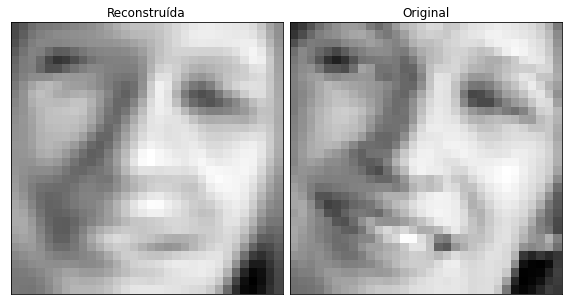

<Figure size 1800x1800 with 0 Axes>

In [15]:
for i in range(100):
    num = randint(0, len(X) - 1)
    sbs_img_plot(project_pca(U, X[num], 100), X[num])

A reconstrução permite diferenciar faces, mas não de identificar - pelo menos visualmente a olho humano - sua maioria. Posições da cabeça e de partes do rosto fora da média geram distorções nas imagens, e detalhes como linhas de expressão, posições da iris, acessórios, entre outros, muitas vezes não estão claros na reconstrução.

Dessa maneira, aplicações interessantes para este tipo de reconstrução são em áreas onde é relevante identificar que certa imagem é de um humano, e seja necessário diferenciar uma pessoa de outra, mas não é relevante identificá-la. Um exemplo de situação é a de carros autônomos: é importante identificar onde estão pedestres para que uma rota segura seja tomada, mas não é primordial identificar cada pessoa. É, aliás, importante que o processo seja ágil de forma a mitigar acidentes (menor tempo de reação), o que justifica uma possível diminuição de detalhes das faces em prol de uma maior agilidade na identificação e tomada de decisões.


### 3.3 Visualização da evolução da reconstrução

De forma análoga às eigenfaces, podemos observar a evolução em vídeo de uma imagem e sua projeção. Tomando e fixando nossa imagem como a de número 489 de nosso banco de faces, considerando as primeiras 500 componentes principais, de 5 em 5, temos:

In [16]:
def proj_evolution_video(U, img_array, lim, step):
    
    # Configurando eixos
    fig = plt.figure(figsize=(15,15))  # Configurar tamanho do grid
    fig.subplots_adjust(hspace=10, wspace=0)  # Configurar espaçamento do grid

    # Função para criar frame
    def animation_frame(i):
        '''
        Creates frame for animation
        '''
        # Bloco referente à imagem reconstruída
        ax = fig.add_subplot(1,2, 1)
        show_img(project_pca(U, img_array, i))
        plt.title(f'Reconstruída, {i} componentes principais', fontsize=20)
        

        # Bloco referente à imagem original
        ax = fig.add_subplot(1,2, 2)
        show_img(img_array)
        plt.title('Original', fontsize=20)
       

    # Criando animação
    animation = FuncAnimation(fig, func=animation_frame, frames=np.arange(0,lim,step), interval=10)

    # Criando pasta e salvando animação
    Path("images").mkdir(parents=True, exist_ok=True)
    animation.save(f'images/proj_evolution.gif')

In [ ]:
proj_evolution_video(U, X[489], 500, 5)

MovieWriter ffmpeg unavailable; using Pillow instead.
<ipython-input-18-2dff6078c370>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,2, 1)
<ipython-input-18-2dff6078c370>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,2, 2)


<img src="images/proj_evolution.gif" width="500" align="center">

A escolha de parâmetros foi baseada no tempo de execução e criação do vídeo, podendo ser mudados caso maior (ou menor) detalhamento da evolução da reconstrução do rosto seja necessária. De qualquer maneira, podemos ver que por mais que a partir do centésimo componente possamos identificar algumas características do rosto escolhido (como os óculos), a imagem se torna mais clara em comparação com a original (formato da boca, por exemplo) a partir do momento que são consideradas as 150 primeiras componentes principais para a projeção, aproximadamente. Além disso, após as 150 primeiras componentes não há um grande ganho de resolução da imagem.

---

# Parte II - Sistemas de Recomendação

> Nesta parte, você desenvolverá um sistema de recomendação de filmes usando filtragem colaborativa. O arquivo _dado2.mat_ contém notas de 1 a 5 dadas por usuários para filmes. A matriz $Y$ armazena na linha $i$ e coluna $j$ a nota dada pelo usuário $j$ para o filme $i$. Já em relação à matriz $R$, temos $R(i,j) = 1$ se o usuário $j$ deu alguma nota para o filme $i$ e $0$ caso contrário.

In [134]:
dado2 = loadmat(filepath_dado2)
Y = dado2.get('Y')
R = dado2.get('R')

In [135]:
dado3 = pd.read_csv(filepath_dado3, encoding='cp860', sep='\n', header=None)

## Questão 1

> Implemente o algoritmo de filtragem colaborativa. Este deverá aprender uma matriz $X$, que em cada linha contém o vetor de atributos $x(i)$ do $i$-ésimo filme e uma matriz $\Theta$, que em cada linha guarda o vetor de parâmetros $\theta(j)$ para o $j$-ésimo usuário. Considere que tanto $x(i)$ quanto $\theta(j)$ possuem dimensão $100$. Considere a função de custo sem regularização e use gradiente conjugado para minimizá-la (o mesmo do Projeto 2).

Etapas:

1. Inicializar $X$ e $\Theta$ com valores aleatórios, criar vetor de parâmetros;
2. Normalizar $Y$ considerando a existência de notas em $R$;
3. Criar função de custo (sem regularização);
4. Minimizar usando o gradiente conjugado.

### 1.1 Inicializar $X$ e $\Theta$ com valores aleatórios, criar vetor de parâmetros

Primeiramente devemos inicializar as matrizes $X$, referentes aos atributos dos filmes, e $\Theta$, referente aos parâmetros dos usuários. Para isso, de forma semelhante a quando trabalhamos com redes neurais, devemos realizar uma quebra de simetria inicializando-as com valores aleatórios.

In [136]:
def initialize_X_Theta(Y, n_features):
    n_movies, n_users = Y.shape
    
    X = np.random.randn(n_movies, n_features)
    Theta = np.random.randn(n_users, n_features)
    params = np.append(X.flatten(), Theta.flatten())
    
    return params

### 1.2 Normalizar $Y$ considerando a existência de notas em $R$

In [137]:
def normalize_Y(Y, R):
    m, n = Y.shape

    mu = np.zeros((m, 1))
    Y_norm = np.zeros((m,n))
    
    for i in range(m):
        mu[i] = np.sum(Y[i,:])/np.count_nonzero(R[i,:])
        Y_norm[i, R[i,:]==1] = Y[i,R[i,:]==1] - mu[i]
        
    return Y_norm

### 1.3 Criar função de custo (sem regularização)

Agora definimos a função de custo, que irá recriar as matrizes $X$ e $Theta$ e calcular ambos o custo quanto o gradiente, para serem inseridos na função _minimize_ para otimização pelo gradiente conjugado.

In [138]:
def cost_function(params, Y, R, n_features):
    n_movies, n_users = Y.shape
    
    X = params[:n_movies*n_features].reshape(n_movies,n_features)
    Theta = params[n_movies*n_features:].reshape(n_users,n_features)
    
    predictions =  X @ Theta.T
    j = (predictions - Y)
    J = 1/2 * np.sum((j**2) * R)
    X_grad = j*R @ Theta
    Theta_grad = (j*R).T @ X
    grad = np.append(X_grad.flatten(),Theta_grad.flatten())
    
    return J, grad   

### 1.4 Minimizar usando o gradiente conjugado

Agora resta otimizar a função custo com o gradiente conjugado, de forma a obter os novos parâmetros a serem convertidos em novas matrizes $X$ e $\Theta$.

In [139]:
def conjugate_gradient(params, Y, R, n_features, n_iter):
    result = minimize(cost_function, params, args=(Y, R, n_features), method='CG', jac=True, tol=None, callback=None, options={'maxiter': n_iter,'disp': True, 'gtol': 1e-4})
    
    return result.x

Considerando um número máximo de 100 iterações, temos para 100 _features_:

In [177]:
n_features = 100
n_iter = 400

params = initialize_X_Theta(Y, n_features)
Y_norm = normalize_Y(Y, R)

new_params = conjugate_gradient(params, Y, R, n_features, n_iter)

         Current function value: 152.491145
         Iterations: 400
         Function evaluations: 594
         Gradient evaluations: 594


## Questão 2

> Com base nas notas preditas por seu algoritmo, liste os 10 filmes com notas médias mais altas, mostrando o nome e a nota média do respectivo filme. Para obter o nome do filme, use o arquivo _dado3.txt_, que contém o nome correspondente a cada linha na matriz $Y$.

Etapas:

1. Criar vetor com notas médias
2. Unir com nomes e ordenar

### 2.1 Criar vetor com notas médias

Primeiramente recriamos, com base no vetor de parâmetros obtidos, as matrizes $X$ e $\Theta$. Depois realizamos a previsão e transformamos a matriz em um vetor com as médias de cada linha, referentes a cada filme.

In [178]:
def get_mean_scores(params, Y):
    n_movies, n_users = Y.shape
    
    X = params[:n_movies*n_features].reshape(n_movies,n_features)
    Theta = params[n_movies*n_features:].reshape(n_users,n_features)
    
    prediction = X @ Theta.T
    
    return prediction.mean(axis=1)

### 2.2 Unir com nomes e ordenar

Agora unimos o vetor das médias com o vetor de nomes, e ordenamos de forma a obter os filmes com as melhores médias.

In [187]:
def show_best_scores(new_params, Y, movie_df, n_movies):

    movie_df['mean_scores'] = get_mean_scores(new_params, Y)
    movie_score_df = movie_df.sort_values(by=['mean_score'],ascending=False)
    movie_score_df.reset_index(drop=True,inplace=True)
    
    for i in range(n_movies):
        print(f'O {i+1}º filme melhor avaliado é {movie_score_df[0][i]}, com nota média de {movie_score_df[1][i].round(1)}')

In [190]:
show_best_scores(new_params, Y, dado3, 5)

O 1º filme melhor avaliado é 50 Star Wars (1977), com nota média de 4.1
O 2º filme melhor avaliado é 22 Braveheart (1995), com nota média de 4.0
O 3º filme melhor avaliado é 313 Titanic (1997), com nota média de 4.0
O 4º filme melhor avaliado é 318 Schindler's List (1993), com nota média de 4.0
O 5º filme melhor avaliado é 427 To Kill a Mockingbird (1962), com nota média de 4.0
